In [9]:
import os
from dotenv import load_dotenv
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
import matplotlib.pyplot as plt


load_dotenv()

True

In [2]:
def load_spirals(filename):
    filepath = os.environ.get("QUESTION5_DATAPATH") + filename
    data = np.loadtxt(filepath, delimiter="\t")
    features = data[:, :2]
    labels = data[:, 2]
    return features, labels


def load_three_circles(filename):
    filepath = os.environ.get("QUESTION5_DATAPATH") + filename
    data = np.loadtxt(filepath, delimiter=",")
    features = data[:, :2]
    labels = data[:, 2]
    return features, labels

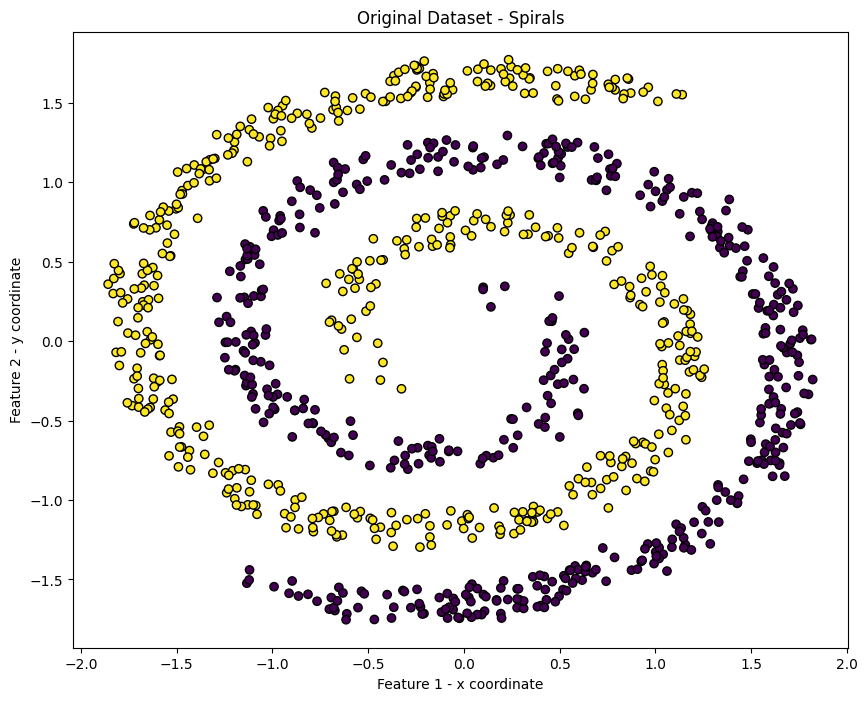

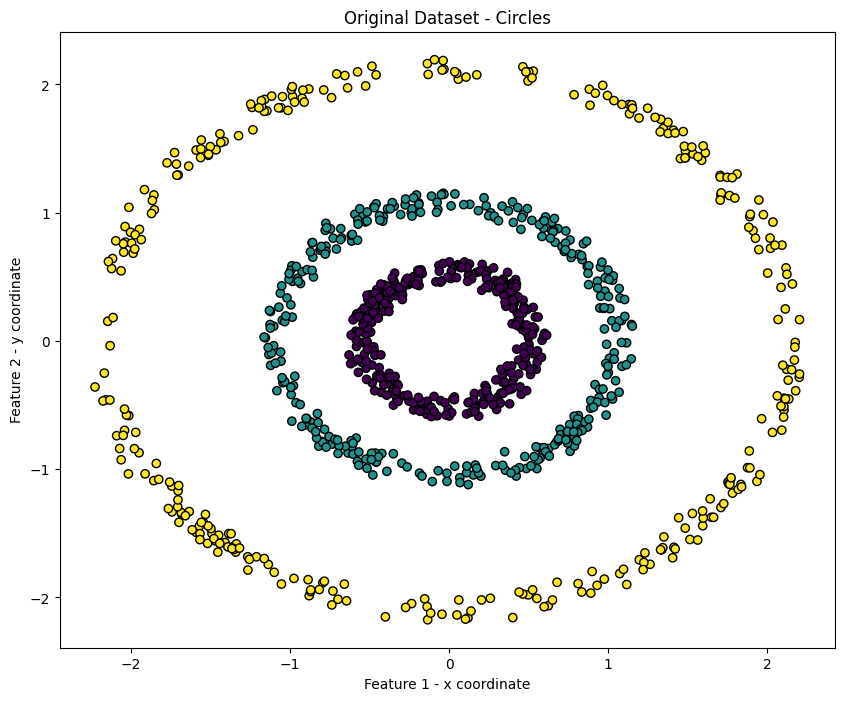

In [ ]:
features_s, labels_s = load_spirals("twoSpirals.txt")
features_c, labels_c = load_three_circles("threecircles.txt")

scaler_s = StandardScaler()
scaler_c = StandardScaler()
features_s = scaler_s.fit_transform(features_s)
features_c = scaler_c.fit_transform(features_c)

plt.figure(figsize=(10, 8))
plt.scatter(features_s[:, 0], features_s[:, 1], c=labels_s, cmap='viridis', edgecolors='K_s')
plt.title("Original Dataset - Spirals")
plt.xlabel("Feature 1 - x coordinate")
plt.ylabel("Feature 2 - y coordinate")
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(features_c[:, 0], features_c[:, 1], c=labels_c, cmap='viridis', edgecolors='k')
plt.title("Original Dataset - Circles")
plt.xlabel("Feature 1 - x coordinate")
plt.ylabel("Feature 2 - y coordinate")
plt.show()

In [8]:
log_reg_s = LogisticRegression()
log_reg_s.fit(features_s, labels_s)

y_pred_s = log_reg_s.predict(features_s)

accuracy_s = accuracy_score(labels_s, y_pred_s)
print(f"Baseline Logistic Regression Accuracy for Spirals: {accuracy_s:.4f}")


log_reg_c = LogisticRegression()
log_reg_c.fit(features_c, labels_c)

y_pred_c = log_reg_c.predict(features_c)

accuracy_c = accuracy_score(labels_c, y_pred_c)
print(f"Baseline Logistic Regression Accuracy for Circles: {accuracy_c:.4f}")

Baseline Logistic Regression Accuracy for Spirals: 0.6610
Baseline Logistic Regression Accuracy for Circles: 0.3510


In [ ]:
euclidean_dist_s = pairwise_distances(features_s, metric="sqeuclidean")

sigma = 3 # or we could use sigma = np.median(euclidean_dist_s) / 2
K_s = np.exp(-euclidean_dist_s / sigma)

N_s = K_s.shape[0]
U_s = np.ones((N_s, N_s)) / N_s
Kn_s = K_s - U_s @ K_s - K_s @ U_s + U_s @ K_s @ U_s

eigvals_s, eigvecs_s = np.linalg.eigh(Kn_s)

sorted_indices_s = np.argsort(eigvals_s)[::-1]
eigvals_s = eigvals_s[sorted_indices_s]
eigvecs_s = eigvecs_s[:, sorted_indices_s]

# Get transformed feature spaces
X3G_s = Kn_s @ eigvecs_s[:, :3]    # First 3 dimensions
X20G_s = Kn_s @ eigvecs_s[:, :20]  # First 20 dimensions
X100G_s = Kn_s @ eigvecs_s[:, :100] # First 100 dimensions


euclidean_dist_c = pairwise_distances(features_c, metric="sqeuclidean")

K_c = np.exp(-euclidean_dist_c / sigma)

N_c = K_c.shape[0]
U_c = np.ones((N_c, N_c)) / N_c
Kn_c = K_c - U_c @ K_c - K_c @ U_c + U_c @ K_c @ U_c

eigvals_c, eigvecs_c = np.linalg.eigh(Kn_c)

sorted_indices_c = np.argsort(eigvals_c)[::-1]
eigvals_c = eigvals_c[sorted_indices_c]
eigvecs_c = eigvecs_c[:, sorted_indices_c]

# Get transformed feature spaces
X3G_c = Kn_c @ eigvecs_c[:, :3]    # First 3 dimensions
X20G_c = Kn_c @ eigvecs_c[:, :20]  # First 20 dimensions
X100G_c = Kn_c @ eigvecs_c[:, :100] # First 100 dimensions

In [16]:
for X_transformed, dim in [(X3G_s, 3), (X20G_s, 20), (X100G_s, 100)]:
    log_reg_new_s = LogisticRegression()
    log_reg_new_s.fit(X_transformed, labels_s)

    y_pred_new_s = log_reg_new_s.predict(X_transformed)

    accuracy_new_s = accuracy_score(labels_s, y_pred_new_s)
    print(f"Logistic Regression Accuracy after Kernel PCA - Spirals ({dim}D): {accuracy_new_s:.4f}")


for X_transformed, dim in [(X3G_c, 3), (X20G_c, 20), (X100G_c, 100)]:
    log_reg_new_c = LogisticRegression()
    log_reg_new_c.fit(X_transformed, labels_c)

    y_pred_new_c = log_reg_new_c.predict(X_transformed)

    accuracy_new_c = accuracy_score(labels_c, y_pred_new_c)
    print(f"Logistic Regression Accuracy after Kernel PCA - Circles({dim}D): {accuracy_new_c:.4f}")

Logistic Regression Accuracy after Kernel PCA - Spirals (3D): 0.6610
Logistic Regression Accuracy after Kernel PCA - Spirals (20D): 0.7560
Logistic Regression Accuracy after Kernel PCA - Spirals (100D): 0.7550
Logistic Regression Accuracy after Kernel PCA - Circles(3D): 1.0000
Logistic Regression Accuracy after Kernel PCA - Circles(20D): 1.0000
Logistic Regression Accuracy after Kernel PCA - Circles(100D): 1.0000


/Users/ajeyk/neu_uml_workspace/chatbot_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ajeyk/neu_uml_workspace/chatbot_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

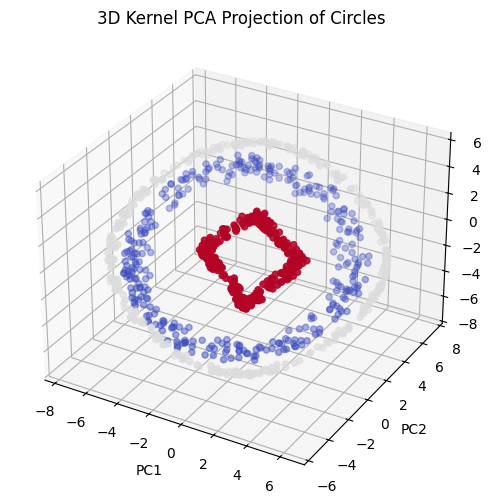

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3G_c[:, 0], X3G_c[:, 1], X3G_c[:, 2], c=labels_c, cmap='coolwarm')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("3D Kernel PCA Projection of Circles")
plt.show()